In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.models import Sequential
from random import randint

In [2]:
# setup and train test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# making a copy before flattening for the next code segment which display images
x_train_drawing = x_train

print("X_Train:", x_train[0])
print("y_Train:", y_train[0])

X_Train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [4]:
image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

In [5]:
print("After reshaping") 
print("X_Train Shape:", x_train.shape) 
print("x_test Shape:", x_test.shape)

After reshaping
X_Train Shape: (60000, 784)
x_test Shape: (10000, 784)


In [6]:
# convert class vector to binary class matrices
num_classes = 10 
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
print("After reshaping")
print("Y_Train Shape:", y_train.shape) 
print("y_test Shape:", y_test.shape)
print("y_Train:", y_train[0])

After reshaping
Y_Train Shape: (60000, 10)
y_test Shape: (10000, 10)
y_Train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


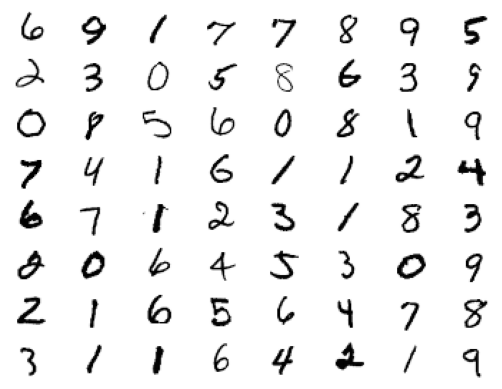

In [8]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [9]:
model = Sequential()
model.add(Input(shape=(image_size,)))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=10, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,306 (591.04 KB)

 Trainable params: 151,306 (591.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_split=0.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1062 - loss: 2.3488 - val_accuracy: 0.1052 - val_loss: 2.2984
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1161 - loss: 2.2977 - val_accuracy: 0.1050 - val_loss: 2.2949
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1186 - loss: 2.2938 - val_accuracy: 0.1050 - val_loss: 2.2919
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1232 - loss: 2.2903 - val_accuracy: 0.1050 - val_loss: 2.2883
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1294 - loss: 2.2855 - val_accuracy: 0.1050 - val_loss: 2.2826
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1229 - loss: 2.2806 - val_accuracy: 0.2085 - val_loss: 2.2751
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1852 - loss: 2.2744 - val_accuracy: 0.1050 - val_loss: 2.2681
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1736 - loss: 2.2654 - val_accu

In [11]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)

print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9357 - loss: 0.2341
Loss: 0.21074841916561127
Accuracy: 0.9430999755859375


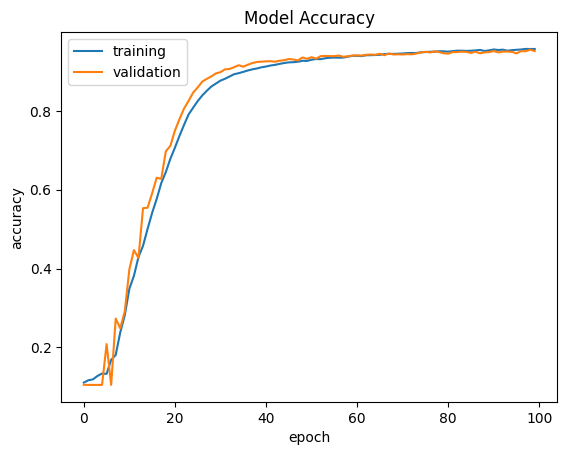

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

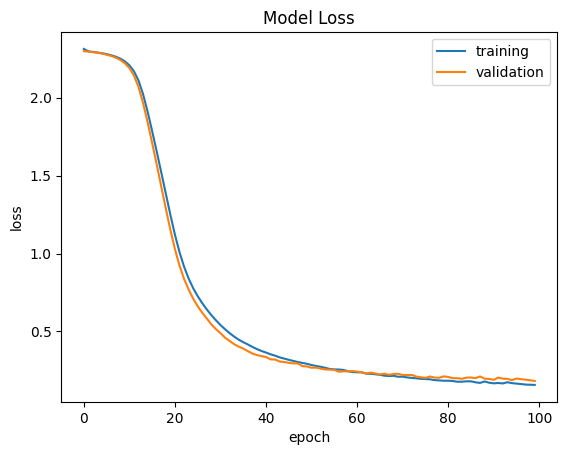

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()